# <font color = "slateblue"> EXAM II </font>
#### <font color = "slateblue"> Math and Stats</font>
#### <font color = "slateblue"> Date: 21st, Feb 2021 </font>

---



## <font color = "limegreen">Student Data</font>

Fill your **NAME** only:

#### Student Name: Oscar Anton

---


## <font color = "limegreen">Instructions</font>

Read carefully these instructions and follow them during your quiz and in your submission.

 * The exam lasts **1 week**
 * Read carefully the questions and do not answer before knowing what is asked
 * Full marks require **full explanations**. Just answering the question is not enough, for example, if one answer is that the type of data is *panel data*, just saying that will not grant you more than the 25% of the available points.
 * The **answers** must be written right below the questions made in this notebook. Use Code and Text cells as needed


---

## <font color = "limegreen"> Packages </font>

In the next cell code add **ALL** the modules you will use in your exam: `numpy`, `pandas`,... 

In [32]:
# Base Modules --------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.stats.weightstats as smw
import statsmodels.stats.proportion as smp
import statsmodels.stats.power as pwr
from statsmodels.stats.power import TTestPower

plt.style.use("seaborn")

In case you work with colab notebooks, use the following cell to connect to your drive

In [ ]:
# from google.colab import drive
# drive.mount('IEXL')

Mounted at IEXL


---

## <font color = "limegreen">The Data </font>

**The High School ad Beyond study contains a set of 200 observations on high school seniors. The variables we find in the dataset are**

<br>

| Variable    |           Description           |
|-------------|---------------------------------|
|  id    | Student ID |
|  gender  | Student's gender (female, male) |
|  race    | Student's race (african american, asian, hispanic, white) |
|  ses  | Socio economic status of student's family (low, middle, high) |
| schtyp | Type of school (public, private) | 
| prog  | Type of program (general, academic, vocational)|
| read  | Standardized reading score |
| write | Standardized writing score |
| math  | Standardized math score |
| science | Standardized science score |
| socst | Standardized social studies score|

<br>

**in order to load it, use the next *code cell*, taking into account that it is a .txt file (named `hsb2` which can be found in the folder of datasets). Add in this same code cell a instruction that lets you see the 5 first rows of the dataset.**

In [2]:
# We read the text file from Github and load the 5 first rows
highschool = pd.read_table('https://raw.githubusercontent.com/oscaranton/hsb2-dsbc/main/hsb2.txt')
highschool.head(5)

,id,gender,race,ses,schtyp,prog,read,write,math,science,socst
0,70,male,white,low,public,general,57,52,41,47,57
1,121,female,white,middle,public,vocational,68,59,53,63,61
2,86,male,white,high,public,general,44,33,54,58,31
3,141,male,white,high,public,vocational,63,44,47,53,56
4,172,male,white,middle,public,academic,47,52,57,53,61



---

## Questions

## 1.- <font color = "Red"> Estimation </font>

**In this first part, let's focus in confidence intervals**

In [155]:
highschool.describe()

,id,read,write,math,science,socst
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,52.230000,52.775000,52.645000,51.850000,52.405000
std,57.879185,10.252937,9.478586,9.368448,9.900891,10.735793
min,1.000000,28.000000,31.000000,33.000000,26.000000,26.000000
25%,50.750000,44.000000,45.750000,45.000000,44.000000,46.000000
50%,100.500000,50.000000,54.000000,52.000000,53.000000,52.000000
75%,150.250000,60.000000,60.000000,59.000000,58.000000,61.000000
max,200.000000,76.000000,67.000000,75.000000,74.000000,71.000000


### 1.1.- <font color = "Blue">Average Scores (2 Points)</font>

**Find the 95% confidence intervals for the standarized scores of all the variables. Give an interpretation of them.**

We do not know the $\sigma$ of the population, but since the sample size $n$ is big enough ($200$) and the variables are random and independent we can use the normal distribution by approximation to the t-distribution using the sample variance.

$$Z = \frac{\bar x-E[\bar x]}{SD[\bar x]}=\frac{\bar x-\mu}{\sigma/\sqrt{n}} $$


This Confidence Interval can be calculated as: $\text{Confidence Interval} = \text{Point Estimator} \pm \text{Margin of Error}$
:
$$
\mu\in\bar x \pm z_{\alpha/2}\frac{\sigma}{\sqrt{n}}
$$

In [3]:
# Data ------------------------------
columns = ['read','write','math','science','socst']
CL = 0.95
SL = 1 - CL

In [4]:
# Calculation of the CIs-------------
for subject in columns:
  n = highschool[subject].dropna().shape[0]
  mean = highschool[subject].dropna().mean()  # the mean of the sample is the point estimator
  std = highschool[subject].dropna().std()    # we use the variance of the sample
  ME = ss.norm.isf(SL/2) * std / np.sqrt(n)   # margin of error
  lower = mean - ME                           # point estimator - margin of error
  upper = mean + ME                           # point estimator + margin of error
  print(f'The {CL:0.0%} Confidence Interval for the mean of {subject.capitalize():.<10} [{lower:4.2f} - {upper:4.2f}]')

The 95% Confidence Interval for the mean of Read...... [50.81 - 53.65]
The 95% Confidence Interval for the mean of Write..... [51.46 - 54.09]
The 95% Confidence Interval for the mean of Math...... [51.35 - 53.94]
The 95% Confidence Interval for the mean of Science... [50.48 - 53.22]
The 95% Confidence Interval for the mean of Socst..... [50.92 - 53.89]


The interpretation of these Confidence Intervals is that if we make 100 random samples of these variables the mean is going to be between these values in the 95 % of the occasions.

### 1.2.- <font color = "Blue">Comparison of Populations (1 Point)</font>

**Using these single population scores, would you say that there is a significant difference bewteen the average grades in `math` and in `read`? Why?**

We create a new variable defined by the difference between the values of the other two (these values can be paired becauses are dependant through the same student) and observe the result values.


In [5]:
# New column in the dataframe with the difference between math and read scores
highschool['diff_math_read'] = highschool['math'] - highschool['read']
highschool.head()

,id,gender,race,ses,schtyp,prog,read,write,math,science,socst,diff_math_read
0,70,male,white,low,public,general,57,52,41,47,57,-16
1,121,female,white,middle,public,vocational,68,59,53,63,61,-15
2,86,male,white,high,public,general,44,33,54,58,31,10
3,141,male,white,high,public,vocational,63,44,47,53,56,-16
4,172,male,white,middle,public,academic,47,52,57,53,61,10


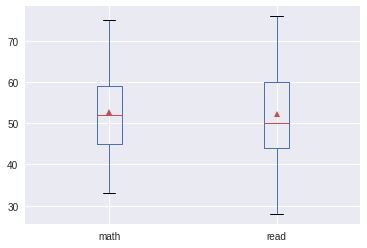

In [6]:
# We also take a look at the boxplot of the values of the two variables (math and read)
highschool[['math', 'read']].dropna().boxplot(showmeans = True)
plt.show()

In [7]:
math_mean = highschool['math'].mean()
read_mean = highschool['read'].mean()
diff_mean = highschool['diff_math_read'].mean()
print(f'The mean for the Math scores is {math_mean:2.2f}\n' 
      f'The mean for the Read scores is {read_mean:2.2f}\n'
      f'The mean for the difference between both scores is {diff_mean:2.2f}'
      )

The mean for the Math scores is 52.65
The mean for the Read scores is 52.23
The mean for the difference between both scores is 0.41


Just by observation we would say that there is no significant difference between the grades in math and read, but we are going to calculate this using the contrast hypothesis because these are mean values and the sample size could mean that individual differences could be bigger. 

The null hypothesis is that there is no difference in the scores (i.e. the mean of the difference between math and read is cero)  and the alternative is that there is a difference (the mean of the difference is not cero).

$$
H_0 : \{ \bar{D}= 0 \}, H_1: \{{\bar{D} \neq 0}\}
$$

We use the t-distribution because the new variable is created from dependant variables.

$$
t_{n-1} = \frac{\overline{d}}{s_d/{\sqrt{n}}}
$$

And we calculate the Confidence Interval with this function:

$$
\mu\in\bar x \pm t_{n-1,\alpha/2}\frac{s}{\sqrt{n}}
\$$

for a $(1-\alpha)\%$ of confidence level

In [8]:
# Data
CL = 0.95
SL = 1 - CL
n = len(highschool['diff_math_read'])

# Values to perform the test
mean = highschool['diff_math_read'].mean()
std = highschool['diff_math_read'].std()
t_val = mean/(std/np.sqrt(n))       # t value
t_crit = ss.t.isf(SL/2,n-1)         # critical value for alpha/2

# Result of the test
print(f't Value is {t_val:2.2f}\n' f'Critical Value is {t_crit:2.2f}')
if t_val > t_crit:
    print('We reject the null hypothesis because t-val is bigger than the Critical Value')
else:
    print('We cannot reject the null hypothesis because t-val is not bigger than the Critical Value')

t Value is 0.72
Critical Value is 1.97
We cannot reject the null hypothesis because t-val is not bigger than the Critical Value


 **RESPUESTA**

### 1.3.- <font color = "Blue">Comparison of Populations (2 Points)</font>

**Using specific methods for two populations, find the 90% confidence interval for the difference in the average grades of `math` and `read`. Is this result in agreement with your previous argument?**

The decision scheme that allow us to determine if there is a significant difference between the grades in both exams is

\begin{equation}
H_0:\{\bar D = 0\},\quad H_1:\{\bar D \neq 0\}
\end{equation}

we perform the test with the indicated significance level

In [9]:
# Data
CL = 0.90
SL = 1 - CL
mu0 = mean

In [10]:
# Descriptive Stats of the difference
desDiff = smw.DescrStatsW(highschool['diff_math_read'].dropna())

# test
tstat, pval, dof = desDiff.ttest_mean(value = mu0,
                                  alternative = 'two-sided')
# result of the test
print('tStat: {:4.3f}\npval: {:6.3f}\nalpha: {:5.3f}'.format(tstat, pval, SL))
if pval < SL:
  print('\nReject H0')
else:
  print('\nFail to Reject H0')


tStat: 0.000
pval:  1.000
alpha: 0.100

Fail to Reject H0


Having rejected the $H_0$ hypothesis we calculate Confidence Interval for the given Condifence Level.

In [11]:
# Calculate the Confidence Interval
diff_low, diff_upp = desDiff.tconfint_mean(SL)
print(f'The {CL:2.0%} CI for the difference between math and read is [{diff_low:4.2f} - {diff_upp:4.2f}]')

The 90% CI for the difference between math and read is [-0.53 - 1.36]


The 90% Confidence Interval for the difference in the average grades in Math and Read is small and reflect the result of the previous test, where we couldn't reject the null hypothesis that there were no difference between those values.

### 1.4.- <font color = "Blue">Proportions (1 Point)</font>

**Find the confidence interval for the proportion of males and of females (separatedly) that failed in `science`**

In [12]:
# We create a series (failed_science) with the values of non-passers in science grouped by gender
CL = 0.95
SL = 1 - CL

failed_science = highschool[highschool['science'] < 50]
failed_science = failed_science.groupby('gender').science.count()
failed_science

gender
female    41
male      30
Name: science, dtype: int64

In [13]:
# Test to check if we can use the Normal Approximation

x_fem = failed_science[0] # females who failed
x_mal = failed_science[1] # males who failed
nf = highschool[highschool['gender'] == 'female']['gender'].count() # number of females
nm = highschool[highschool['gender'] == 'male']['gender'].count() # number of males
pf = x_fem/nf # proportion of females who failed
pm = x_mal/nm # proportion of males who failed

NPf = nf*pf
NQf = nf*(1-pf)

if NPf >= 10:
  if NQf >= 10:
    print("We can use the Normal Approximation for females because np = {:<3.0f} and nq = {:<3.0f}".format(NPf,NQf))
else:
  print("We cannot use the Normal Approximation for females because np = {:<3.0f} and nq = {:<3.2f}".format(NPf,NQf))

NPm = nm*pm
NQm = nm*(1-pm)

if NPm >= 10:
  if NQm >= 10:
    print("We can use the Normal Approximation for males because np = {:<3.0f} and nq = {:<3.0f}".format(NPm,NQm))
else:
  print("We cannot use the Normal Approximation for males because np = {:<3.0f} and nq = {:<3.2f}".format(NPm,NQm))

We can use the Normal Approximation for females because np = 41  and nq = 68 
We can use the Normal Approximation for males because np = 30  and nq = 61 


Because we can use the Normal Approximation we use the following statistic
$$
Z = \frac {\hat p - P} {\sqrt{\frac{\hat p(1- P)}{n}}}
$$

And calculating the interval with this formula:

$$
P\in p\pm z_{\alpha/2}\sqrt{\frac{p(1-p)}{n}}
$$

for a $(1-\alpha)\%$ of Confidence Level.

In [14]:
# We calculate the Margin of Error
MEf = ss.norm.ppf(1-SL/2)*np.sqrt(pf*(1-pf)/nf)
MEm = ss.norm.ppf(1-SL/2)*np.sqrt(pm*(1-pm)/nm)

# And with the ME we calculate the boundaries of the Confidence Interval
lower_pf = pf - MEf
upper_pf = pf + MEf

lower_pm = pm - MEm
upper_pm = pm + MEm

print("The {:3.2%} Confidence Interval for the proportion of females that failed the science score is [{:4.2%}, {:4.2%}]".format(CL, lower_pf, upper_pf))
print("The {:3.2%} Confidence Interval for the proportion of males that failed the science score is [{:4.2%}, {:4.2%}]".format(CL, lower_pm, upper_pm))

The 95.00% Confidence Interval for the proportion of females that failed the science score is [28.52%, 46.71%]
The 95.00% Confidence Interval for the proportion of males that failed the science score is [23.31%, 42.63%]


## 2.- <font color = "Red"> Hypothesis Testing </font>

**For each of the following questions clearly state the decision scheme you choose and why. Also, before any test, check that the conditions for inference are satisfied.**

### 2.1.- <font color = "Blue"> First Test (2 Points) </font> 

**Perform a test to see if the average grade in `math` is above 52 points. What about the average grade in `science`, is it greater than 52?**

The conditions for inference are satisfied:

- The sample is random.
- The distribution is normal: The sampling distribution of the sample mean $(\bar x)$,is approximately normal because the sample is big enough $(n>200)$
- The observations are independent, and because they are from different students they can be considered so.

We are to test the null hypothesis of the grade being less or equal to 52, in both subjects, against the alternative hypothesis of being greater than 52.

$$
H_0 : \{ \mu <= 52 \}, H_1: \{{\mu > 52}\}
$$

To do this we use the t-distribution because we do not have the variance of the population, but since the $n$ is big enough $(n=200)$ we can fallback to the normal approximation to the t-distribution with $n-1$ degrees of freedom.

$$
t_{n-1} = \frac {\bar{x}-\mu}{s/\sqrt{n}}
$$

In [15]:
# Data ------------------------------------------
SL = 0.05
CL = 1 - SL
mu0 = 52
subjects = ['math', 'science']

# Test ------------------------------------------
for subject in subjects:
  mean = highschool[subject].mean()
  std = highschool[subject].std()
  n = highschool[subject].shape[0]

  t_val = (mean-mu0)/(std/np.sqrt(n))    # t-value
  p_val = ss.t.sf(t_val, n-1)   # p-value using the t-distribution for the t-value with n-1 dof

  #print(f'The t-value for {subject.capitalize()} is {t_val:4.2f} and the p-value is {p_val:4.2f}')

  if p_val < t_val:
    print(f'The mean for {subject.capitalize()} is {mean:4.2f}'
        f'\nSince the p-value [{p_val:4.2f}] is smaller than the t-value [{t_val:4.2f}] we can reject the null hypothesis for {subject.capitalize()}\n')
  else:
    print(f'The mean for {subject.capitalize()} is {mean:4.2f}'
        f'\nSince the p-value [{p_val:4.2f}] is not smaller than the t-value [{t_val:4.2f}] we cannot reject the null hypothesis for {subject.capitalize()}\n')


The mean for Math is 52.65
Since the p-value [0.17] is smaller than the t-value [0.97] we can reject the null hypothesis for Math

The mean for Science is 51.85
Since the p-value [0.58] is not smaller than the t-value [-0.21] we cannot reject the null hypothesis for Science



### 2.2.- <font color = "Blue">Second Test (2 Points)</font>

**Perform a test to see if the average grade in `science` and in `write` is different between males and females (separatedly the different courses)**

The conditions for inference are satisfied taking the same considerations than for the previous exercise.

For each subject, Science and Write, we test if the difference in the average grades for males and females is cero (null hypothesis) againt the possibility that it is different from cero (alternative hypothesis)

$$
H_0 : \{ \mu_{m} - \mu_{f} = 0 \}, H_1: \{{ \mu_{m} - \mu_{f} \neq 0}\}
$$

This is a bilateral test with different variances and independecy.

$$
t_\nu = \frac {(\bar x_{m} - \bar x_{f})} {\sqrt{s^2_{m}/n_{males} + s^2_{f}/n_{f}}}
$$

$$
t_\nu = \frac {(\bar x_{m} - \bar x_{f}) - (\mu_{m}-\mu_{f})} {\sqrt{s^2_{m}/n_{m} + s^2_{f}/n_{f}}}
$$


In [16]:
# Data ------------------------------------------
SL = 0.05
CL = 1 - SL

# Calculation -----------------------------------
for column in ['science', 'write']:

    ds_m = highschool[column][highschool['gender'] == 'male'].dropna()
    mean_m = ds_m.mean()
    
    ds_f = highschool[column][highschool['gender'] == 'female'].dropna()
    mean_f = ds_f.mean()
    
    # Test with independence, two-sided
    t_stat, p_val, t_stat_dof = smw.ttest_ind(ds_m, ds_f, alternative = "two-sided",\
                                              usevar = 'unequal', value = 0)
    
    print(f'Average Grade Test between males and females for {column.capitalize()} \n'
    f'{"Mean for males:":.<20}{mean_m:<10.2f}\n'
    f'{"Mean for females:":.<20}{mean_f:<10.2f}\n'
    f'{"Degrees of Freedom:":.<20}{t_stat_dof:<10.0f}\n'
    f'{"p_val:":.<20}{p_val:<8.4f}\n'
    f'{"SL - alpha:":.<20}{SL:<8.2f}'
    )
    
    if p_val < SL: 
        print(f'Since {p_val:0.4f} is lower than {SL:0.2f} we can reject H0 (no difference) for {column.capitalize()}\n')
    else:
        print(f'Since {p_val:0.4f} is not lover than {SL:0.2f} we cannot reject H0 (no difference) for {column.capitalize()}\n')

Average Grade Test between males and females for Science 
Mean for males:.....53.23     
Mean for females:...50.70     
Degrees of Freedom:.177       
p_val:..............0.0760  
SL - alpha:.........0.05    
Since 0.0760 is not lover than 0.05 we cannot reject H0 (no difference) for Science

Average Grade Test between males and females for Write 
Mean for males:.....50.12     
Mean for females:...54.99     
Degrees of Freedom:.170       
p_val:..............0.0003  
SL - alpha:.........0.05    
Since 0.0003 is lower than 0.05 we can reject H0 (no difference) for Write



### 2.3.- <font color = "Blue"> Third Test (2 Points)</font>

**Perform a test to see if the proportion of students from public schools who passed `socst` is the same as that of those from a private school.**

The conditions for inference are satisfied taking the same considerations than for the previous exercise.

We are going to test if there is no difference in the proportion students of Social Studies in public and private school who passed the exam. So the difference between those two averages should be cero (null hypothesis) or different from cero (alternative hypothesis).

$$
H_0 : \{ \mu_{public} - \mu_{private} = 0 \}, H_1: \{{ \mu_{public} - \mu_{private} \neq 0}\}
$$

Statistical to be used

$$
z = \frac{\hat p_{public} - \hat p_{private}}{\sqrt{\hat p(1-\hat p)\left(\frac{1}{n_{private}}+\frac{1}{n_{public}}\right)}}
$$

Pooled sample proportion, that can be used under the null hypothesis

$$
\hat p = \frac{x_{public} + x_{private}}{n_{public} + n_{private}}
$$

In [18]:
# we create a new variable with two different levels (true or false) for passing the grade or not
highschool['socst_pass'] = highschool['socst'] >= 50
highschool.head()

,id,gender,race,ses,schtyp,prog,read,write,math,science,socst,diff_math_read,socst_pass
0,70,male,white,low,public,general,57,52,41,47,57,-16,True
1,121,female,white,middle,public,vocational,68,59,53,63,61,-15,True
2,86,male,white,high,public,general,44,33,54,58,31,10,False
3,141,male,white,high,public,vocational,63,44,47,53,56,-16,True
4,172,male,white,middle,public,academic,47,52,57,53,61,10,True


In [20]:
# We create a table that groups students considering if they pass the grade or not and the type of school they attended
socst_pass = highschool.groupby(['socst_pass','schtyp']).size().unstack()
socst_pass

schtyp,private,public
socst_pass,,
False,8,60
True,24,108


In [21]:
# we check the conditions of normality
for column in ['private', 'public']:
    
    n = socst_pass[column].sum()
    p = socst_pass[column][True]/n
    q = 1 - p

    print(f'{column.capitalize()} schools\n'
          f'n*p = {n*p:<2.0f}\n'
          f'n*q = {n*q:<2.0f}\n'
          f'n*p*q = {n*p*q:<2.0f}'
          )
    
    if (n*p >= 10 and n*q >= 10) or n*p*q >= 5:
        print(f'We can use the normal approximation for {column} schools\n')
    else: 
        print(f'We cannot use the normal approximation for {column} schools\n')

Private schools
n*p = 24
n*q = 8 
n*p*q = 6 
We can use the normal approximation for private schools

Public schools
n*p = 108
n*q = 60
n*p*q = 39
We can use the normal approximation for public schools



In [22]:
# Data
SL = 0.05
CL = 1-SL

# public schools
n_public = socst_pass['public'].sum()
x_public = socst_pass['public'][True]
p_public = x_public/n_public

# private schools
n_private = socst_pass['private'].sum()
x_private = socst_pass['private'][True]
p_private = x_private/n_private

# Pooled sample proportion
psp = (x_public + x_private)/(n_public + n_private)

# Test
diff_pp = p_public - p_private
z_stat = diff_pp/np.sqrt(psp*(1-psp)*(1/n_public + 1/n_private))
p_val = ss.norm.sf(z_stat) * 2 

print(f'SL - alpha = {SL:<8.2f}\n'f'p_pooled = {psp:0.2f}\n'f'z_stat = {z_stat:<10.2f}\n'f'p_val = {p_val:<8.2f}')
if p_val < SL: 
    print(f'Because p-value [{p_val:<0.2f}] is smaller than SL [{SL:<0.2f}] we can reject H0\n')
else:
    print(f'Because p-value [{p_val:<0.2f}] is not smaller than SL [{SL:<0.2f}] we cannot reject H0\n')

SL - alpha = 0.05    
p_pooled = 0.66
z_stat = -1.17     
p_val = 1.76    
Because p-value [1.76] is not smaller than SL [0.05] we cannot reject H0



### 2.4.- <font color = "Blue"> Power (2 Points)</font>

**You have already performed a test to compare the grades in `science` between males and females. Whatever your previous result, you know that an average difference of 3 points may be indicative of a case to analyse deeply. Then find the probability that you detect a difference of 3 points from your sample in favor a males in case this difference actually exists.**

The hypothesis is under the assumption of a right tailed test.

$$
H_0 : \{ \mu_{m} - \mu_{f} <= 3 \}, H_1: \{{ \mu_{m} - \mu_{f} > 3}\}
$$


$$
H_0 : \{ \mu_{m} - \mu_{f} = 3 \}, H_1: \{{ \mu_{m} - \mu_{f} = 4}\}
$$

To use the data of two different populations we used the Pooled Standard Deviation

$$
\text{Pooled Standar Deviation} = \sqrt\frac{(n_m-1)*s_m^2 + (n_f-1)*s_f^2}{n_m + n_f -2}
$$



In [35]:
# population means
mu0 = 3
mu1 = 4

# sample values
mean_m = highschool['science'][highschool['gender'] == 'male'].mean()
mean_f = highschool['science'][highschool['gender'] == 'female'].mean()
std_m = highschool['science'][highschool['gender'] == 'male'].std()
std_f = highschool['science'][highschool['gender'] == 'female'].std()
n_m = len(highschool['science'][highschool['gender'] == 'male'])
n_f = len(highschool['science'][highschool['gender'] == 'female'])

# pooled standard deviation
pstd = np.sqrt(((n_m-1)*(std_m**2)+(n_f-1)*(std_f**2))/(n_m + n_f -2))

# effect size
effect_size = mu1/pstd

# significance level
SL = 0.05
CL = 1- SL

# compute of the power
pwo = pwr.TTestIndPower()
power = pwo.power(effect_size, n_m, SL, ratio= n_f/n_m, df= n_m+n_f-2, alternative= 'two-sided')

print(f'The probability of a Type II error is {1-power:1.6f}\nThe power of the test is {power:1.6f}\n'
      f'There is a probability of {power:0.2%} of detecting an average difference of 3 points in the grades in favour of males in Science in this sample')

The probability of a Type II error is 0.187387
The power of the test is 0.812613
There is a probability of 81.26% of detecting an average difference of 3 points in the grades in favour of males in Science in this sample


### 2.5.- <font color = "Blue"> Sample size (2 Points)</font>

**If in the previous question you want that the probability is 99.999% while the significance level is 0.001, what is the sample size you may need?**

In [30]:
# data
prob = 0.99999
SL = 0.00001

# compute using TTestPower
power_analysis = TTestPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, power = pwr, alpha = SL, alternative = 'larger')

# print the output
print(f'The sample size needed for a probability of {prob:0.3%} and a significance level of {SL:0.3%} is {sample_size:1.0f}')

The sample size needed for a probability of 99.999% and a significance level of 0.001% is 436
